In [1]:
#Based on https://elitedatascience.com/keras-tutorial-deep-learning-in-python#step-1
%matplotlib inline
import numpy as np
np.random.seed(123)

In [3]:
from keras.models import Sequential

In [44]:
from keras.layers import Convolution2D, MaxPool2D, Conv2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


TypeError: Invalid dimensions for image data

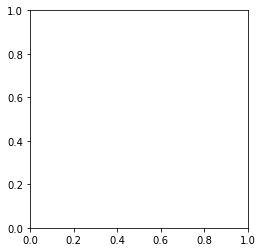

In [52]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1])

In [53]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [54]:
print(X_train.shape)

(60000, 28, 28, 1)


In [55]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [56]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [57]:
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test, 10)

In [58]:
print(Y_train.shape)

(60000, 10)


In [59]:
model=Sequential()

#input shape is the same as depth, width, height of each image
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 156s - loss: 0.7818 - acc: 0.7410   
Epoch 2/10
60000/60000 [==============================] - 181s - loss: 0.4156 - acc: 0.8719   
Epoch 3/10
60000/60000 [==============================] - 150s - loss: 0.3529 - acc: 0.8892   
Epoch 4/10
60000/60000 [==============================] - 148s - loss: 0.3134 - acc: 0.9037   
Epoch 5/10
60000/60000 [==============================] - 158s - loss: 0.2898 - acc: 0.9097   
Epoch 6/10
60000/60000 [==============================] - 160s - loss: 0.2708 - acc: 0.9159   
Epoch 7/10
60000/60000 [==============================] - 146s - loss: 0.2570 - acc: 0.9200   
Epoch 8/10
60000/60000 [==============================] - 154s - loss: 0.2452 - acc: 0.9248   
Epoch 9/10
60000/60000 [==============================] - 148s - loss: 0.2346 - acc: 0.9284   
Epoch 10/10
60000/60000 [==============================] - 147s - loss: 0.2214 - acc: 0.9310   


In [64]:
score = model.evaluate(X_test, Y_test, verbose=1)

 9952/10000 [============================>.] - ETA: 0s

In [68]:
print(model.metrics_names) 
print(score)

['loss', 'acc']
[0.088938268476724619, 0.97199999999999998]
